In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Paris/gtfs/gtfsOUT/stop_times.txt', sep=',', header=0, low_memory=False)

In [3]:
data.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'pickup_type', 'drop_off_type', 'local_zone_id', 'stop_headsign',
       'timepoint'],
      dtype='object')

In [18]:
data_virtual = data[data['trip_id'].str.contains("Hub")]
data_virtual.reset_index(inplace=True)

In [19]:
data_virtual = data_virtual[['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence']]

In [20]:
dep_time = []
for i, row in data_virtual.iterrows():
    timestring = row['departure_time']
    h,m,s = timestring.split(":")
    seconds = int(h)*3600 + int(m) * 60 + int(s)
    dep_time.append(seconds)
data_virtual['dep_time_s'] = dep_time

In [21]:
len(data_virtual)

12022

In [34]:
T = []
for i, row in data_virtual.iterrows():
    if (i%2) == 0:
        t1 = data_virtual.loc[i,'dep_time_s']
        t2 = data_virtual.loc[i+1,'dep_time_s']
        t = t2-t1
        T.append(t)
        T.append(t)
data_virtual['tt_s'] = T

In [39]:
data_virtual.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,dep_time_s,tt_s
0,12-Hub_0>1,08:00:32,08:00:32,12,1,28832,344
1,12-Hub_0>1,08:06:16,08:06:16,Hub_0,2,29176,344
2,12-Hub_0>2,08:03:32,08:03:32,12,1,29012,344
3,12-Hub_0>2,08:09:16,08:09:16,Hub_0,2,29356,344
4,12-Hub_0>3,08:06:32,08:06:32,12,1,29192,344


In [40]:
dataV = data_virtual[data_virtual['trip_id'].str.contains("12-Hub")]

In [41]:
dataV[dataV['stop_id']=='12']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,dep_time_s,tt_s
0,12-Hub_0>1,08:00:32,08:00:32,12,1,28832,344
2,12-Hub_0>2,08:03:32,08:03:32,12,1,29012,344
4,12-Hub_0>3,08:06:32,08:06:32,12,1,29192,344
6,12-Hub_0>4,08:09:32,08:09:32,12,1,29372,344
8,12-Hub_0>5,08:12:32,08:12:32,12,1,29552,344
10,12-Hub_0>6,08:15:32,08:15:32,12,1,29732,344
12,12-Hub_0>7,08:18:32,08:18:32,12,1,29912,344
14,12-Hub_0>8,08:21:32,08:21:32,12,1,30092,344
16,12-Hub_0>9,08:24:32,08:24:32,12,1,30272,344
18,12-Hub_0>10,08:27:32,08:27:32,12,1,30452,344


In [42]:
dataV[dataV['stop_id']=='Hub_0']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,dep_time_s,tt_s
1,12-Hub_0>1,08:06:16,08:06:16,Hub_0,2,29176,344
3,12-Hub_0>2,08:09:16,08:09:16,Hub_0,2,29356,344
5,12-Hub_0>3,08:12:16,08:12:16,Hub_0,2,29536,344
7,12-Hub_0>4,08:15:16,08:15:16,Hub_0,2,29716,344
9,12-Hub_0>5,08:18:16,08:18:16,Hub_0,2,29896,344
11,12-Hub_0>6,08:21:16,08:21:16,Hub_0,2,30076,344
13,12-Hub_0>7,08:24:16,08:24:16,Hub_0,2,30256,344
15,12-Hub_0>8,08:27:16,08:27:16,Hub_0,2,30436,344
17,12-Hub_0>9,08:30:16,08:30:16,Hub_0,2,30616,344
19,12-Hub_0>10,08:33:16,08:33:16,Hub_0,2,30796,344


In [43]:
data_virtual_Hubs = data_virtual[data_virtual['stop_id'].str.contains("Hub") == False]

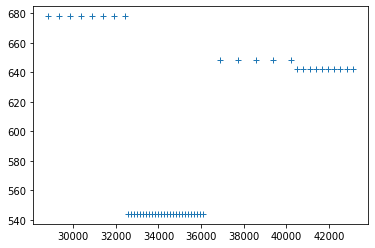

In [57]:
dataV_H = data_virtual_Hubs[data_virtual_Hubs['stop_id']== '186']
plt.plot(dataV_H['dep_time_s'], dataV_H['tt_s'],'+')